# ✈️ Airline Sentiment Analysis Project

**🧠 Overview of the Process**

This project involved analyzing real-world Twitter data to explore how different U.S. airlines are perceived by customers on social media. Using a dataset with over 14,000 tweets labeled by sentiment, I performed the following steps:



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

**📊Data Cleaning & Preparation**

Converted the tweet_created field to datetime format.

Dropped missing and irrelevant fields to maintain data quality.

Selected key columns such as airline, airline_sentiment, retweet_count, and text, date

In [4]:
!pip install kaggle

In [6]:
os.environ['KAGGLE_USERNAME']='asrapervaiz'
os.environ['KAGGLE_KEY'] = '46a2d40a05c1e0f41adf0e11fa8c2ea6'

In [7]:
!kaggle datasets download -d crowdflower/twitter-airline-sentiment

Dataset URL: https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment
License(s): CC-BY-NC-SA-4.0
  0% 0.00/2.55M [00:00<?, ?B/s]
100% 2.55M/2.55M [00:00<00:00, 475MB/s]


In [8]:
!unzip twitter-airline-sentiment.zip

Archive:  twitter-airline-sentiment.zip
  inflating: Tweets.csv              
  inflating: database.sqlite         


In [9]:
df = pd.read_csv('Tweets.csv')

In [10]:
df.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [12]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [13]:
df.isnull().sum()

,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,5462
negativereason_confidence,4118
airline,0
airline_sentiment_gold,14600
name,0
negativereason_gold,14608
retweet_count,0


In [14]:
cols_to_keep = ['tweet_created', 'airline_sentiment', 'retweet_count', 'text','airline','name']
df= df[cols_to_keep].dropna()

# Convert 'tweet_created' to datetime
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

In [15]:
retweet_mean_by_sentiment_category = df.groupby('airline_sentiment')['retweet_count'].mean()
print('\nMean Retweet by Sentiment Category:')
print(retweet_mean_by_sentiment_category)


Mean Retweet by Sentiment Category:
airline_sentiment
negative    0.093375
neutral     0.060987
positive    0.069403
Name: retweet_count, dtype: float64


In [16]:
tweet_counts_by_sentiment = df['airline_sentiment'].value_counts()
print("\nNumber of tweets per sentiment:")
print(tweet_counts_by_sentiment)


Number of tweets per sentiment:
airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


**📈 EDA: Sentiment Distribution**

Explored retweet patterns as a proxy for user engagement.

Created time series plots to observe trends in tweet volumes.

Performed sentiment-wise statistics to compare average retweets and tweet volumes.


/tmp/ipython-input-17-496651609.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='airline_sentiment', data=df, order=['negative', 'neutral', 'positive'], palette='pastel')


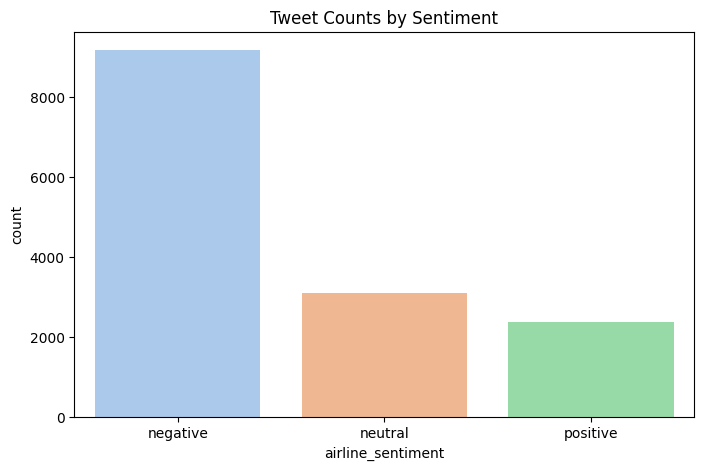

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x='airline_sentiment', data=df, order=['negative', 'neutral', 'positive'], palette='pastel')
plt.title('Tweet Counts by Sentiment')
plt.show()

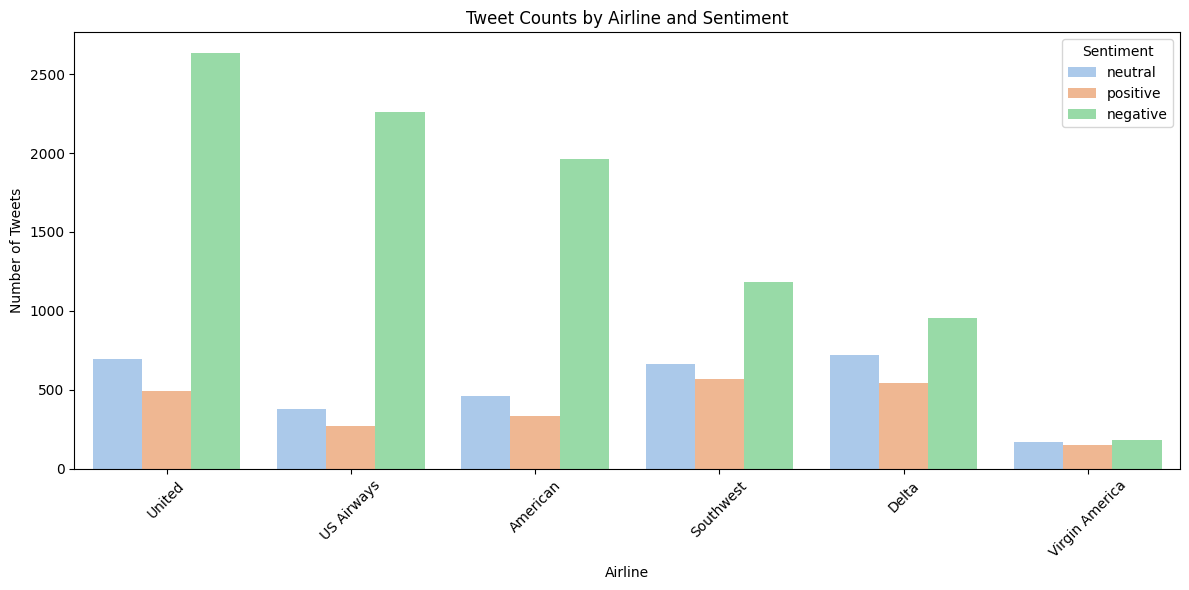

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='airline', hue='airline_sentiment',
              order=df['airline'].value_counts().index,
              palette='pastel')

plt.title('Tweet Counts by Airline and Sentiment')
plt.xlabel('Airline')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

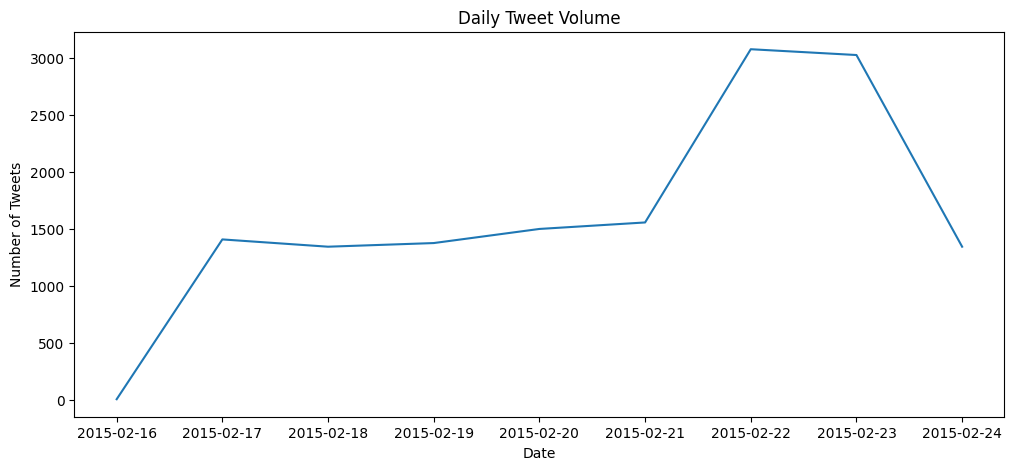

In [19]:
# Time series: tweets per day
df['date'] = df['tweet_created'].dt.date
daily_counts = df.groupby('date').size()

plt.figure(figsize=(12,5))
daily_counts.plot()
plt.title('Daily Tweet Volume')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

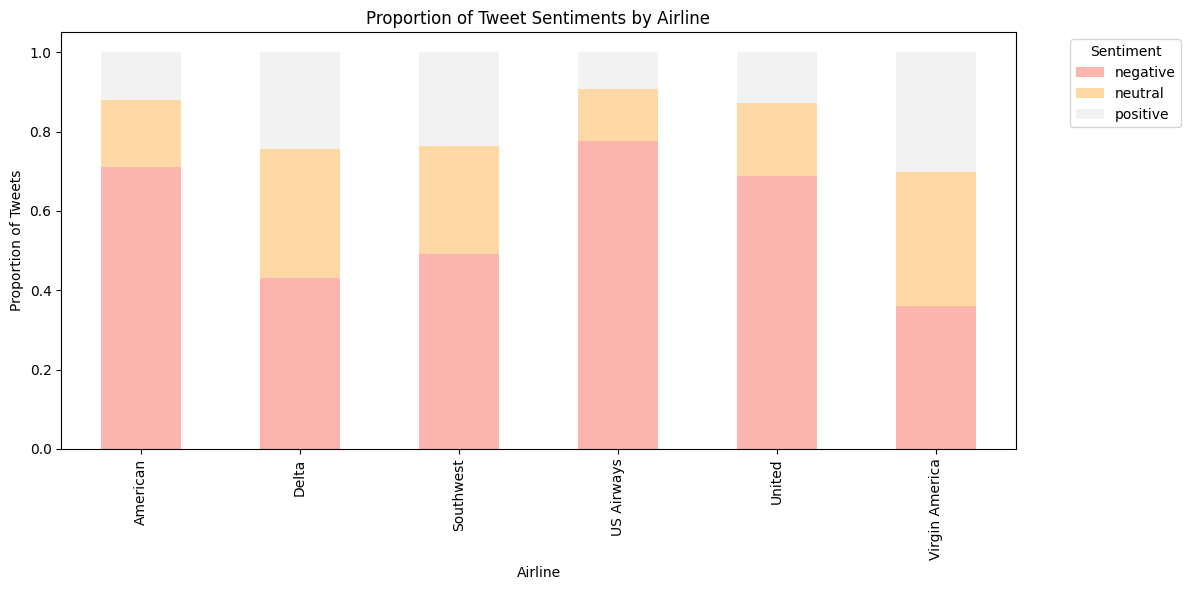

In [22]:
# Calculate counts
counts = pd.crosstab(df['airline'], df['airline_sentiment'])

# Normalize by row (airline) to get proportions
proportions = counts.div(counts.sum(axis=1), axis=0)

# Plot stacked bar chart of proportions
proportions.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Pastel1')

plt.title('Proportion of Tweet Sentiments by Airline')
plt.xlabel('Airline')
plt.ylabel('Proportion of Tweets')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipython-input-23-650254232.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='airline_sentiment', y='retweet_count', data=df, order=['negative', 'neutral', 'positive'], palette='Set2')


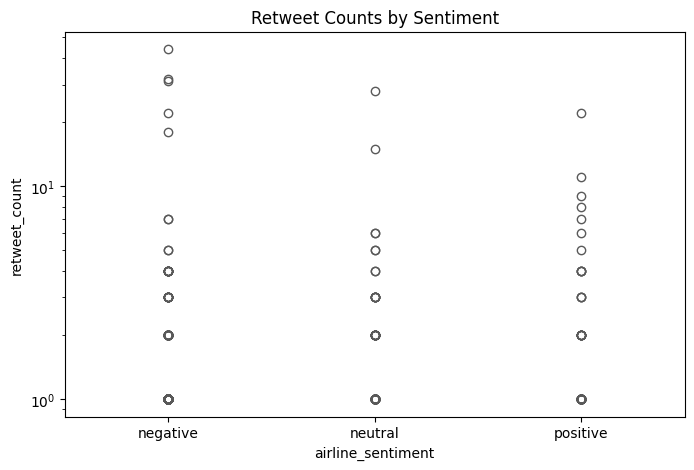

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x='airline_sentiment', y='retweet_count', data=df, order=['negative', 'neutral', 'positive'], palette='Set2')
plt.yscale('log')  # Retweet counts are often skewed, log scale helps visualization
plt.title('Retweet Counts by Sentiment')
plt.show()

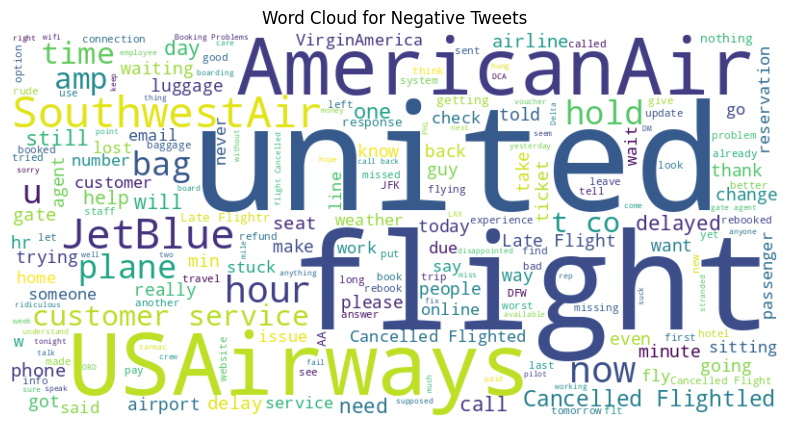

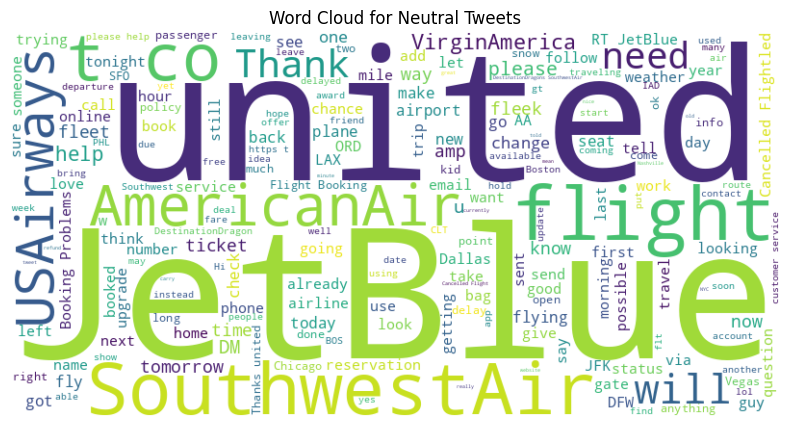

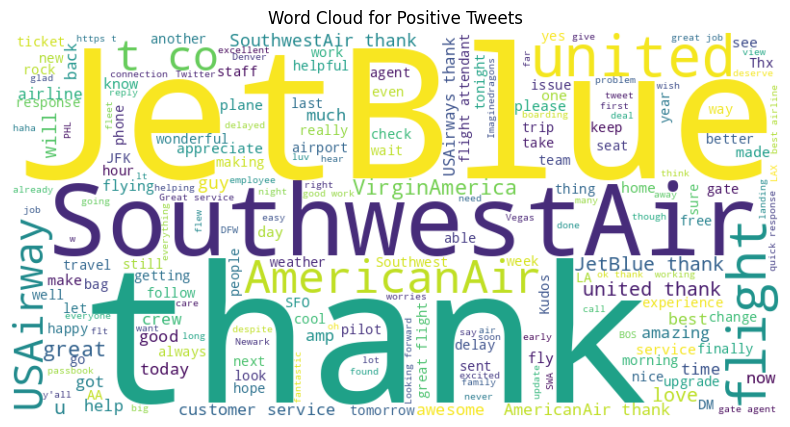

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to plot word cloud of tweets by sentiment
def plot_wordcloud(sentiment):
    text = ' '.join(df[df['airline_sentiment'] == sentiment]['text'].values)
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Tweets')
    plt.show()

# Plot word clouds
for sentiment in ['negative', 'neutral', 'positive']:
    plot_wordcloud(sentiment)


## 📌 Conclusion & Key Takeaways
Negative tweets dominate most airline mentions, with airlines like United and American receiving higher negative sentiment.

Engagement (retweets) does not vary significantly by sentiment on average, but outliers exist, where strongly worded tweets are shared more.

Tweet volume patterns suggest that social media activity spikes around certain periods, possibly in response to delays or service failures.

**What Sets My Project Apart**

Real-world data challenges: I didn’t just run models on clean data — I tackled missing values, messy formats, and inconsistent fields.

Insightful visual storytelling: Beyond statistics, I used compelling visualizations to explain sentiment trends, category comparisons, and time-based behaviors.

Business relevance: This project simulates a practical scenario—brand monitoring and customer feedback analysis—that’s vital for real-world airline operations, marketing, and public relations.

🔧 **Suggestions for Future Improvement**

Include Text Analysis: Use NLP models (like VADER or TextBlob) to perform sentiment scoring on the raw tweet text for comparison with the labeled sentiment.

Track specific event spikes: Align tweet timestamps with known airline events (e.g., delays, promotions) to better explain sentiment patterns.

Dashboard Integration: Build an interactive Power BI or Tableau dashboard for non-technical stakeholders to explore tweet trends.

Geo Analysis: If location data were more complete, map regional tweet sentiment to uncover geography-specific issues.